
<h1 style="text-align: center; font-weight: bold;">📊 Análisis del rendimiento de Atlético Bucaramanga</h1>
<h2 style="text-align: center;">Comparación entre entrenadores: Dudamel, Florentín y Leonel</h2>

---

## 🎯 Introducción

El objetivo de este análisis es comparar el rendimiento de Atlético Bucaramanga bajo tres entrenadores distintos: **Rafael Dudamel, Gustavo Florentín y Leonel Álvarez**.  

Se estudiarán métricas relacionadas con:
- Goles a favor y en contra.
- Resultados (victoria, empate, derrota).
- Diferencia de gol.
- Rendimiento en condición de **local** y **visitante**.

Los datos fueron obtenidos desde la página **FBref** y se procesaron con Python (Pandas, Matplotlib, Seaborn).


#**⚙️ Preparación del entorno**
Primero se importan las librerias necesarias para el análisis que se llevará acabo:

- **pandas**: para la manipulación y análisis de datos.
- **seaborn** y **matplotlib**: para la visualización de datos.



In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 🧾 Metodología

El análisis se estructura de la siguiente manera:

1. **Fuente de datos**: Se utiliza la base pública de **FBref**, que contiene estadísticas de partidos oficiales.  
2. **Alcance**: Se incluyen partidos de Liga y torneos internacionales; no se incluyen partidos de Copa Colombia.  
3. **Procesamiento**:
   - Se creó una función en Python (`load_and_clear`) para limpiar y estandarizar los datos.  
   - Se seleccionaron solo columnas relevantes (fecha, resultado, goles, rival, condición de local/visitante).  
4. **Segmentación**: Los partidos se dividieron según el entrenador responsable:
   - Rafael Dudamel (2024)  
   - Gustavo Florentín (2025, hasta el partido vs Pereira)  
   - Leonel Álvarez (2025, después de Florentín)  
5. **Métricas calculadas**: Goles a favor/en contra, diferencia de gol, porcentaje de victorias/empates/derrotas y rendimiento local/visitante.


## 🧹 Función de carga y limpieza de datos

Se define la función `load_and_clear(url)`, que realiza las siguientes tareas:

1. **Carga** los datos desde la página de FBref a partir de una URL.
2. **Selecciona** solo las columnas relevantes (fecha, competencia, lugar, resultado, goles a favor/en contra, rival).
3. **Convierte** los valores de goles a tipo numérico (en caso de que estén como texto).
4. **Elimina** filas con valores faltantes en goles.
5. **Transforma** la columna `Date` a formato de fecha para facilitar el análisis temporal.

Esta función se reutilizará para cargar y preparar los datos de cada entrenador.

In [87]:
def load_and_clear(url):
  df = pd.read_html(url, header=1)[0]
  if 'Round' in df.columns and 'Comp' not in df.columns:
    df.rename(columns={'Round': 'Comp'}, inplace=True)
  df = df[['Date', 'Comp','Venue','Result','GF', 'GA', 'Opponent']].copy()
  #Convert data type
  if(df['GF'].dtype == object):
    for col in ['GF', 'GA']:
        df[col] = df[col].str.extract(r"(\d+)")
        df[col] = df[col].replace("NaN", pd.NA)
        df[col] = df[col].astype("Int64")
  else:
    df = df.dropna(subset=['GF','GA'])
    df[['GA', 'GF']] = df[['GA','GF']].astype(int)
  #Filter data
  df = df.dropna()
  df['Date'] = pd.to_datetime(df['Date'])
  return df


## 📥 Carga de los datos de partidos

Con la función `load_and_clear()` se cargan los datos de los partidos del Atlético Bucaramanga desde la página de **FBref**.

👉 El dataset incluye partidos de **Liga** y de **torneos internacionales**, pero **no contempla los partidos de Copa Colombia**.  


Se realiza la separación en tres etapas correspondientes a cada entrenador:

- **Rafael Dudamel** → Temporada 2024 (Primera A).  
- **Gustavo Florentín** → Inicio de la temporada 2025 hasta el partido contra **Pereira**.  
- **Leonel Álvarez** → Resto de la temporada 2025 después de Florentín.  

De esta forma, podremos comparar métricas y resultados de manera diferenciada para cada proceso.


In [88]:
#Extract data season 2025
df = load_and_clear('https://fbref.com/en/squads/9b9a8c22/2025/matchlogs/all_comps/misc/CA-Bucaramanga-Match-Logs-All-Competitions')
#Select data for Florentin
df_florentin = df.loc[:(df.index[df['Opponent']== 'Pereira'][0])].copy()
#Select data for Leonel
df_leonel = df.loc[~df.index.isin(df_florentin.index)].copy()
#Select and filter data for Dudamel
df_dudamel = load_and_clear('https://fbref.com/en/squads/9b9a8c22/2024/matchlogs/c41/misc/CA-Bucaramanga-Match-Logs-Primera-A')

## ⚽ Cálculo de goles a favor y en contra

Para cada entrenador se calculan:

- **Goles a favor (GF)**: total de goles marcados en todos los partidos de su etapa.  
- **Goles en contra (GA)**: total de goles recibidos.  
- **Frecuencia de goles**: se estima cuántos minutos pasan, en promedio, entre cada gol a favor y cada gol en contra.  

👉 Esto permite comparar no solo la cantidad total de goles, sino también la **eficiencia ofensiva y defensiva** de cada proceso.


In [89]:
#Calculate GF/GA
GF_florentin = df_florentin['GF'].sum()
GA_floretin = df_florentin['GA'].sum()
GF_leonel = df_leonel['GF'].sum()
GA_leonel = df_leonel['GA'].sum()
GF_dudamel = df_dudamel['GF'].sum()
GA_dudamel = df_dudamel['GA'].sum()
total_minutes_dudamel = len(df_dudamel)*90
total_minutes_florentin = len(df_florentin)*90
total_minutes_leonel = len(df_leonel)*90
GF_per_minute_dudamel = total_minutes_dudamel/GF_dudamel
GF_per_minute_florentin = total_minutes_florentin/GF_florentin
GF_per_minute_leonel = total_minutes_leonel/GF_leonel
GA_per_minute_dudamel = total_minutes_dudamel/GA_dudamel
GA_per_minute_florentin = total_minutes_florentin/GA_floretin
GA_per_minute_leonel = total_minutes_leonel/GA_leonel
print(f"Dudamel\nGoles a favor cada: {GF_per_minute_dudamel:.3f} minutos\nGoles en contra cada: {GA_per_minute_dudamel:.3f} minutos\n")
print(f"Florentin\nGoles a favor cada: {GF_per_minute_florentin} minutos\nGoles en contra cada: {GA_per_minute_florentin} minutos\n")
print(f"Leonel\nGoles a favor cada: {GF_per_minute_leonel:.3f} minutos\nGoles en contra cada: {GA_per_minute_leonel:.3f} minutos\n")


Dudamel
Goles a favor cada: 79.615 minutos
Goles en contra cada: 125.455 minutos

Florentin
Goles a favor cada: 240.0 minutos
Goles en contra cada: 80.0 minutos

Leonel
Goles a favor cada: 56.000 minutos
Goles en contra cada: 81.290 minutos



## 📊 Distribución de resultados

En esta sección se contabilizan los resultados de cada entrenador:

- **Victorias (W)**  
- **Empates (D)**  
- **Derrotas (L)**  

Con esta información se calcula el **porcentaje de cada tipo de resultado** sobre el total de partidos dirigidos por cada entrenador.  

👉 Esto nos permite identificar tendencias generales, por ejemplo, si un entrenador fue más propenso a empatar, perder o ganar durante su ciclo.


In [91]:
#amount of each result for each coach
#Dudamel coach
win_dudamel  = len(df_dudamel[df_dudamel['Result'] == 'W'])
draw_dudamel = len(df_dudamel[df_dudamel['Result'] == 'D'])
defeat_dudamel = len(df_dudamel[df_dudamel['Result'] == 'L'])
#Florentin coach
win_florentin  = len(df_florentin[df_florentin['Result'] == 'W'])
draw_florentin = len(df_florentin[df_florentin['Result'] == 'D'])
defeat_florentin = len(df_florentin[df_florentin['Result'] == 'L'])
#Leonel coach
win_leonel  = len(df_leonel[df_leonel['Result'] == 'W'])
draw_leonel = len(df_leonel[df_leonel['Result'] == 'D'])
defeat_leonel = len(df_leonel[df_leonel['Result'] == 'L'])
#Percentage by matches
#Dudamel
win_percentage_dudamel = (win_dudamel/len(df_dudamel))*100
draw_percentage_dudamel = (draw_dudamel/len(df_dudamel))*100
defeat_percentage_dudamel = (defeat_dudamel/len(df_dudamel))*100
#florentin
win_percentage_florentin = (win_florentin/len(df_florentin))*100
draw_percentage_florentin = (draw_florentin/len(df_florentin))*100
defeat_percentage_florentin  = (defeat_florentin/len(df_florentin))*100
#leonel
win_percentage_leonel = (win_leonel/len(df_leonel))*100
draw_percentage_leonel = (draw_leonel/len(df_leonel))*100
defeat_percentage_leonel = (defeat_leonel/len(df_leonel))*100

## 📉 Visualización de la distribución de resultados

Para cada entrenador se calculó el porcentaje de partidos **ganados, empatados y perdidos**.  

La siguiente gráfica de barras muestra la comparación:  

- **Eje X** → tipo de resultado (ganados, empatados, perdidos).  
- **Eje Y** → porcentaje respecto al total de partidos dirigidos.  
- **Colores**:
  - Verde = victorias  
  - Gris = empates  
  - Rojo = derrotas  

👉 Esta visualización permite observar rápidamente qué entrenador obtuvo mayor proporción de victorias y cuál tuvo más derrotas o empates.


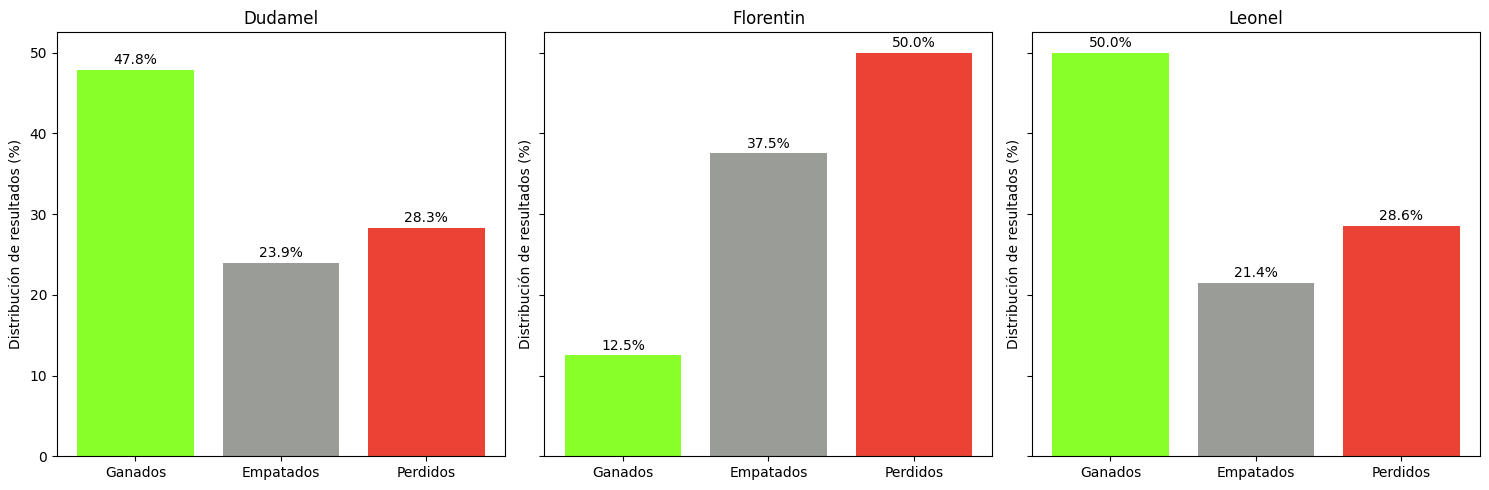

In [92]:
fig, ax = plt.subplots(1,3,figsize=(15,5), sharey = True)
etiquetas = ["Ganados", "Empatados", "Perdidos"]
ax[0].bar(etiquetas,[win_percentage_dudamel, draw_percentage_dudamel, defeat_percentage_dudamel],color=["#89ff29","#9a9c98","#ea4335"])
ax[1].bar(etiquetas,[win_percentage_florentin, draw_percentage_florentin, defeat_percentage_florentin],color=["#89ff29","#9a9c98","#ea4335"])
ax[2].bar(etiquetas,[win_percentage_leonel, draw_percentage_leonel, defeat_percentage_leonel],color=["#89ff29","#9a9c98","#ea4335"])
for a in ax:
  a.set_ylabel('Distribución de resultados (%)')
  a.bar_label(a.containers[0], fmt="%.1f%%", label_type="edge", padding=2)

ax[0].set_title("Dudamel")
ax[1].set_title("Florentin")
ax[2].set_title("Leonel")
plt.tight_layout()
plt.show()

## ⚖️ Diferencia de gol (GD)

La **diferencia de gol (GD)** se obtiene restando los goles en contra (GA) a los goles a favor (GF).  

Se calculan dos métricas:  
- **GD total**: diferencia de gol acumulada durante toda la etapa de cada entrenador.  
- **GD dinámica (cumsum)**: diferencia de gol acumulada partido a partido, lo que permite observar la evolución del equipo a lo largo del tiempo.


In [93]:
#Calculate Goal Diference (GD)
GD_dudamel = GF_dudamel - GA_dudamel
GD_florentin = GF_florentin - GA_floretin
GD_leonel = GF_leonel - GA_leonel
print(f"Diferencia de Gol de cada etapa \nDudamel: {GD_dudamel}\nFlorentin: {GD_florentin}\nLeonel: {GD_leonel}")

Diferencia de Gol de cada etapa 
Dudamel: 19
Florentin: -6
Leonel: 14


In [94]:
#Save the dynamic goal difference (match-to-match) in the data frame
df_dudamel['GD'] = (df_dudamel['GF'] - df_dudamel['GA']).cumsum()
df_florentin['GD'] = (df_florentin['GF'] - df_florentin['GA']).cumsum()
df_leonel['GD'] = (df_leonel['GF'] - df_leonel['GA']).cumsum()

## 🏟️ Rendimiento local vs visitante

Se dividen los partidos según la condición de **local** o **visitante**.  

Esto permite calcular métricas diferenciadas (victorias, empates, derrotas, rendimiento) en función del lugar donde se jugó el partido.  

👉 Con este análisis se busca identificar si el Bucaramanga mostró un comportamiento distinto cuando jugaba en casa frente a cuando jugaba fuera.


In [95]:
#Data separated by home or away match
df_dudamel_home = df_dudamel[df_dudamel['Venue'] == "Home"]
df_dudamel_away = df_dudamel[df_dudamel['Venue'] == "Away"]
df_florentin_home = df_florentin[df_florentin['Venue'] == "Home"]
df_florentin_away = df_florentin[df_florentin['Venue'] == "Away"]
df_leonel_home = df_leonel[df_leonel['Venue'] == "Home"]
df_leonel_away = df_leonel[df_leonel['Venue'] == "Away"]
win_dudamel_home = len(df_dudamel_home[df_dudamel_home['Result'] == 'W'])
draw_dudamel_home = len(df_dudamel_home[df_dudamel_home['Result'] == 'D'])
win_dudamel_away = len(df_dudamel_away[df_dudamel_away['Result'] == 'W'])
draw_dudamel_away = len(df_dudamel_away[df_dudamel_away['Result'] == 'D'])
win_florentin_home = len(df_florentin_home[df_florentin_home['Result'] == 'W'])
draw_florentin_home = len(df_florentin_home[df_florentin_home['Result'] == 'D'])
win_florentin_away = len(df_florentin_away[df_florentin_away['Result'] == 'W'])
draw_florentin_away = len(df_florentin_away[df_florentin_away['Result'] == 'D'])
win_leonel_home = len(df_leonel_home[df_leonel_home['Result'] == 'W'])
draw_leonel_home = len(df_leonel_home[df_leonel_home['Result'] == 'D'])
win_leonel_away = len(df_leonel_away[df_leonel_away['Result'] == 'W'])
draw_leonel_away = len(df_leonel_away[df_leonel_away['Result'] == 'D'])

## 📈 Rendimiento según puntos obtenidos

El **rendimiento** es una métrica común en el fútbol colombiano que mide la eficiencia de un equipo para sumar puntos.  

Se calcula con la fórmula:

$$
\text{Rendimiento (%)} = \frac{(\text{Partidos ganados} \times 3) + (\text{Partidos empatados} \times 1)}{\text{Total de partidos} \times 3} \times 100
$$

De esta forma, se obtiene el porcentaje de puntos logrados frente al total posible.

En las siguientes gráficas se compara el rendimiento de Bucaramanga bajo cada entrenador en tres escenarios:

- **Local** 🏟️ → Partidos jugados en casa.  
- **Visitante** ✈️ → Partidos jugados fuera de casa.  
- **Total** ⚽ → Promedio general de toda la etapa.  

👉 Esto permite observar diferencias de desempeño según la condición de juego y comparar la eficiencia de cada proceso.


In [96]:
#Performance = (matches won *3 + tied matches)*100/(all matches*3)
performance_dudamel_all = (((win_dudamel*3) + draw_dudamel)/(len(df_dudamel)*3))*100
performance_dudamel_home = (((win_dudamel_home*3) + draw_dudamel_home)/(len(df_dudamel_home)*3))*100
performance_dudamel_away = (((win_dudamel_away*3) + draw_dudamel_away)/(len(df_dudamel_away)*3))*100
performance_florentin_all = (((win_florentin*3) + draw_florentin)/(len(df_florentin)*3))*100
performance_florentin_home = (((win_florentin_home*3) + draw_florentin_home)/(len(df_florentin_home)*3))*100
performance_florentin_away = (((win_florentin_away*3) + draw_florentin_away)/(len(df_florentin_away)*3))*100
performance_leonel_all = (((win_leonel*3) + draw_leonel)/(len(df_leonel)*3))*100
performance_leonel_home = (((win_leonel_home*3) + draw_leonel_home)/(len(df_leonel_home)*3))*100
performance_leonel_away = (((win_leonel_away*3) + draw_leonel_away)/(len(df_leonel_away)*3))*100

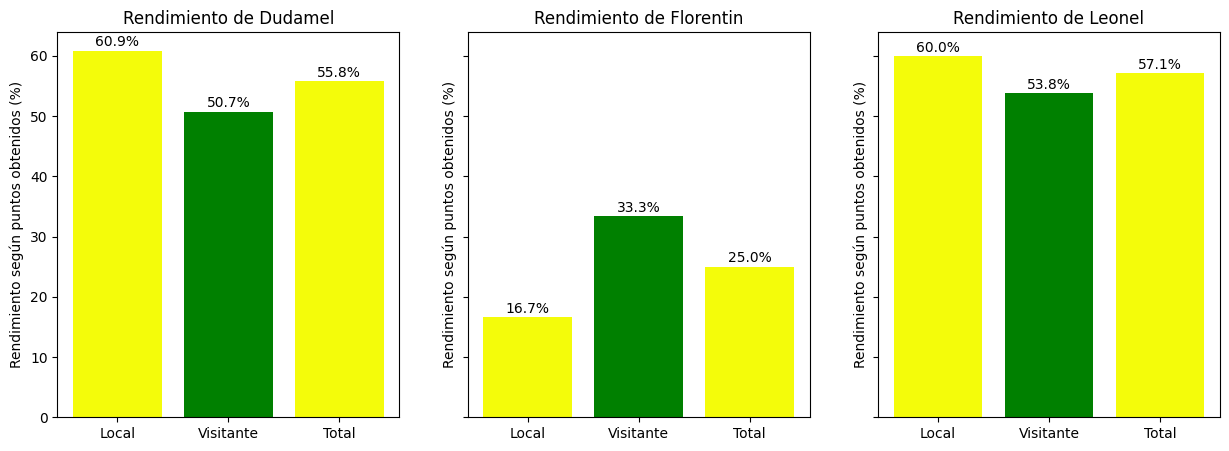

In [97]:
#Performance charts
fig, ax = plt.subplots(1,3,figsize=(15,5), sharey=True)
etiquetas = ['Local', 'Visitante', 'Total']
ax[0].bar(etiquetas, [performance_dudamel_home, performance_dudamel_away, performance_dudamel_all], color=['#f4fc0a', 'green','#f4fc0a'])
ax[0].set_title('Rendimiento de Dudamel')
ax[1].bar(etiquetas, [performance_florentin_home, performance_florentin_away, performance_florentin_all], color=['#f4fc0a', 'green','#f4fc0a'])
ax[1].set_title('Rendimiento de Florentin')
ax[2].bar(etiquetas, [performance_leonel_home, performance_leonel_away, performance_leonel_all], color=['#f4fc0a', 'green','#f4fc0a'])
ax[2].set_title('Rendimiento de Leonel')

for a in ax:
  a.set_ylabel('Rendimiento según puntos obtenidos (%)')
  a.bar_label(a.containers[0], fmt="%.1f%%", label_type="edge", padding=1)

## 📉 Evolución de goles a lo largo del tiempo

En esta sección se visualiza la evolución de los goles de Atlético Bucaramanga bajo cada entrenador:  

- **Goles a favor (GF)** → promedio móvil de 3 partidos, en color verde.  
- **Goles en contra (GA)** → promedio móvil de 3 partidos, en color rojo.  
- **Diferencia de gol (GD)** → línea discontinua azul, acumulada partido a partido.  

👉 Esta representación permite identificar tendencias ofensivas y defensivas en cada proceso, como rachas de victorias, caídas de rendimiento o mejoras puntuales en defensa/ataque.


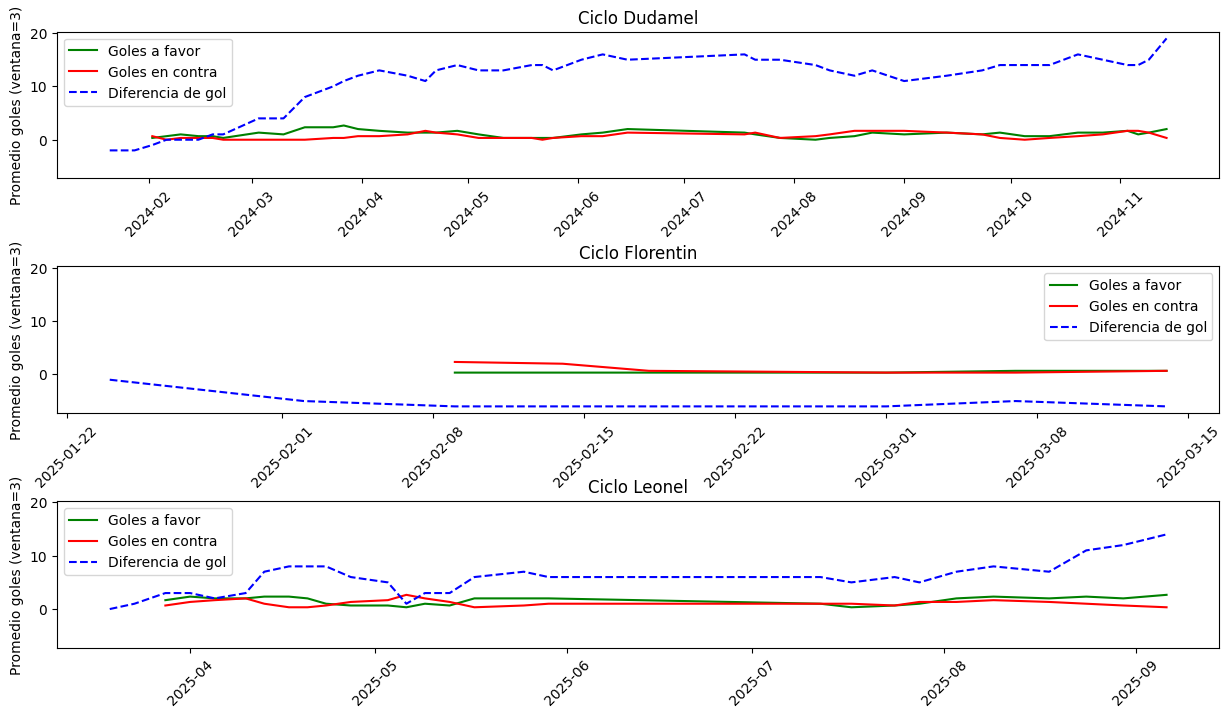

In [98]:
#Goal evolution graphs
fig, ax = plt.subplots(3,1,figsize=(15,8), sharey=True)
ax[0].plot(df_dudamel['Date'], df_dudamel["GF"].rolling(window=3).mean(), color="green", label="Goles a favor")
ax[0].plot(df_dudamel['Date'], df_dudamel['GA'].rolling(window=3).mean(), color="red", label="Goles en contra")
ax[0].plot(df_dudamel['Date'], df_dudamel['GD'], color="blue", label="Diferencia de gol", linestyle="--")
ax[0].legend()
ax[0].set_title("Ciclo Dudamel")
plt.xticks(rotation=45)

ax[1].plot(df_florentin['Date'], df_florentin["GF"].rolling(window=3).mean(), color="green", label="Goles a favor")
ax[1].plot(df_florentin['Date'], df_florentin['GA'].rolling(window=3).mean(), color="red", label="Goles en contra")
ax[1].plot(df_florentin['Date'], df_florentin['GD'], color="blue", label="Diferencia de gol", linestyle="--")
ax[1].legend()
ax[1].set_title("Ciclo Florentin")
plt.xticks(rotation=45)

ax[2].plot(df_leonel['Date'], df_leonel["GF"].rolling(window=3).mean(), color="green", label="Goles a favor")
ax[2].plot(df_leonel['Date'], df_leonel['GA'].rolling(window=3).mean(), color="red", label="Goles en contra")
ax[2].plot(df_leonel['Date'], df_leonel['GD'], color="blue", label="Diferencia de gol", linestyle="--")
ax[2].legend()
ax[2].set_title("Ciclo Leonel")
for a in ax:
    a.tick_params(axis="x", rotation=45)
    a.set_ylabel("Promedio goles (ventana=3)")

plt.subplots_adjust(hspace=0.6)

#**✅ Conclusiones**

1. **Frecuencia de goles convertidos**
La etapa de Leonel Álvarez fue la más ofensiva y efectiva, con un gol cada 56 minutos. En contraste, el ciclo de Florentín fue el más pobre en ataque, necesitando en promedio más de dos partidos y medio (240 minutos) para marcar un gol. Dudamel se mantuvo en un punto intermedio, con un gol cada ~80 minutos.

2. **Solidez defensiva**
El equipo más sólido en defensa fue el de Dudamel, al que solo le convertían un gol cada 125 minutos (casi un partido y medio). Por su parte, los equipos de Leonel y Florentín presentaron métricas similares, recibiendo goles cada 81 y 80 minutos, respectivamente.

3. **Diferencia de gol (GD)**
Aunque Leonel y Florentín encajaban goles a ritmos parecidos, el primero marcó una gran diferencia por su capacidad ofensiva, lo que elevó su balance positivo. Sin embargo, el liderazgo en diferencia de gol fue para Dudamel, gracias a su mayor solidez defensiva.

4. **Rendimiento local vs visitante**
Tanto Dudamel como Leonel tuvieron un desempeño fuerte en casa, con rendimientos casi idénticos (60.9% y 60% respectivamente). Como visitantes, la ventaja pasó a Leonel (53.8%) sobre Dudamel (50.7%). En contraste, el ciclo de Florentín se caracterizó por un bajo rendimiento tanto de local como de visitante.

5. **Comparación global de procesos**
En el balance general, existe una paridad importante entre las etapas de Leonel y Dudamel. Leonel mostró un mejor rendimiento global (57.1% vs 55.8%), mientras que Dudamel destacó en defensa y diferencia de gol. Leonel equilibró esa ventaja con su gran capacidad ofensiva.
El proceso de Florentín, en cambio, quedó claramente rezagado en todas las métricas, evidenciando el peor rendimiento de los tres.